

# Supervised Machine Learning- Classification Template
How do you work through a predictive modeling- Classification based Machine learning problem end-to-end? 
In this jupyter note you will work through a case study classication predictive modeling problem in Python
including each step of the applied machine learning process. 
After completing this project, you will know:



## Content

* [1. Introduction](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2)
    * [4.2.Data Transformation](#3.2) 
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Common Classification Models](#4.3.1)
        * [5.3.2 Ensemble Models](#4.3.2)
        * [5.3.3 Deep Learning Models](#4.3.3)    
* [6. Model Tuning and Grid Search](#5)  
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2) 
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Introduction

Our goal in this jupyter notebook is to under the following
- How to work through a classication predictive modeling problem end-to-end.
- How to use data transforms to improve model performance.
- How to use algorithm tuning to improve model performance.
- How to use ensemble methods and tuning of ensemble methods to improve model performance.
- Following models are implemented and checked:  

    * Logistic Regression
    * Linear Discriminant Analysis
    * K Nearest Neighbors 
    * Decision Tree (CART)
    * Support Vector Machine 
    * Ada Boost
    * Gradient Boosting Method
    * Random Forest
    * Extra Trees
    * Neural Network - Shallow 
    * Deep Neural Network 

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

Using TensorFlow backend.


<a id='1.2'></a>
## 2.2. Loading the Data

In [2]:
# load dataset
dataset = read_csv('D:\\MachineLearning\\Data\\2. Loan Default\\german_credit_data.csv')

In [3]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [5]:
# shape
dataset.shape

(1000, 31)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,0


In [7]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

CHK_ACCT            int64
DURATION            int64
HISTORY             int64
NEW_CAR             int64
USED_CAR            int64
FURNITURE           int64
RADIO/TV            int64
EDUCATION           int64
RETRAINING          int64
AMOUNT              int64
SAV_ACCT            int64
EMPLOYMENT          int64
INSTALL_RATE        int64
MALE_DIV            int64
MALE_SINGLE         int64
MALE_MAR_or_WID     int64
CO-APPLICANT        int64
GUARANTOR           int64
PRESENT_RESIDENT    int64
REAL_ESTATE         int64
PROP_UNKN_NONE      int64
AGE                 int64
OTHER_INSTALL       int64
RENT                int64
OWN_RES             int64
NUM_CREDITS         int64
JOB                 int64
NUM_DEPENDENTS      int64
TELEPHONE           int64
FOREIGN             int64
RESPONSE            int64
dtype: object

In [8]:
# describe data
set_option('precision', 3)
dataset.describe()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,TELEPHONE,FOREIGN,RESPONSE
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,1.577,20.903,2.545,0.234,0.103,0.181,0.280,0.050,0.097,3271.258,...,35.546,0.186,0.179,0.713,1.407,1.904,1.155,0.404,0.037,0.700
std,1.258,12.059,1.083,0.424,0.304,0.385,0.449,0.218,0.296,2822.737,...,11.375,0.389,0.384,0.453,0.578,0.654,0.362,0.491,0.189,0.458
min,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,250.000,...,19.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
25%,0.000,12.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,1365.500,...,27.000,0.000,0.000,0.000,1.000,2.000,1.000,0.000,0.000,0.000
50%,1.000,18.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,2319.500,...,33.000,0.000,0.000,1.000,1.000,2.000,1.000,0.000,0.000,1.000
75%,3.000,24.000,4.000,0.000,0.000,0.000,1.000,0.000,0.000,3972.250,...,42.000,0.000,0.000,1.000,2.000,2.000,1.000,1.000,0.000,1.000
max,3.000,72.000,4.000,1.000,1.000,1.000,1.000,1.000,1.000,18424.000,...,75.000,1.000,1.000,1.000,4.000,3.000,2.000,1.000,1.000,1.000


In [9]:
# class distribution
dataset.groupby('HISTORY').size()

HISTORY
0     40
1     49
2    530
3     88
4    293
dtype: int64

## 3.2. Handling Categorical Data for visualisation

In [10]:
#converting the following features to 'category' type
dataset["C_ACCOUNT"]=dataset["CHK_ACCT"].astype("category")
dataset['JOB_TYPE']=dataset['JOB'].astype('category')
dataset['RESIDENT']=dataset['PRESENT_RESIDENT'].astype('category')
dataset['EMPLOY']=dataset['EMPLOYMENT'].astype('category')
dataset['S_ACCOUNT']=dataset['SAV_ACCT'].astype('category')
dataset['CRED_HIST']=dataset['HISTORY'].astype('category')
#dropping the old features
dataset.drop(['CHK_ACCT','HISTORY','SAV_ACCT','PRESENT_RESIDENT','JOB','EMPLOYMENT'],axis=1,inplace=True)


In [11]:
#creating dummy variables for the categorical features
dummies=pd.get_dummies(dataset,columns=['C_ACCOUNT','JOB_TYPE','RESIDENT','EMPLOY','S_ACCOUNT','CRED_HIST'],drop_first=True)

#viewing the shape and columns of the data set 
dummies.shape
dummies.columns

Index(['DURATION', 'NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING',
       'AMOUNT', 'INSTALL_RATE', 'MALE_DIV', 'MALE_SINGLE', 'MALE_MAR_or_WID', 'CO-APPLICANT',
       'GUARANTOR', 'REAL_ESTATE', 'PROP_UNKN_NONE', 'AGE', 'OTHER_INSTALL', 'RENT', 'OWN_RES',
       'NUM_CREDITS', 'NUM_DEPENDENTS', 'TELEPHONE', 'FOREIGN', 'RESPONSE', 'C_ACCOUNT_1',
       'C_ACCOUNT_2', 'C_ACCOUNT_3', 'JOB_TYPE_1', 'JOB_TYPE_2', 'JOB_TYPE_3', 'RESIDENT_2',
       'RESIDENT_3', 'RESIDENT_4', 'EMPLOY_1', 'EMPLOY_2', 'EMPLOY_3', 'EMPLOY_4', 'S_ACCOUNT_1',
       'S_ACCOUNT_2', 'S_ACCOUNT_3', 'S_ACCOUNT_4', 'CRED_HIST_1', 'CRED_HIST_2', 'CRED_HIST_3',
       'CRED_HIST_4'],
      dtype='object')

<a id='2.2'></a>
## 3.2. Data Visualization

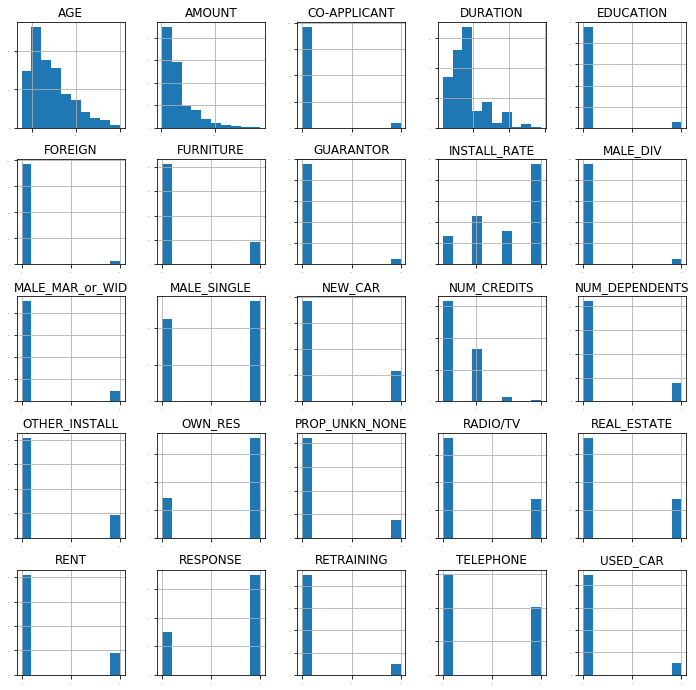

In [12]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

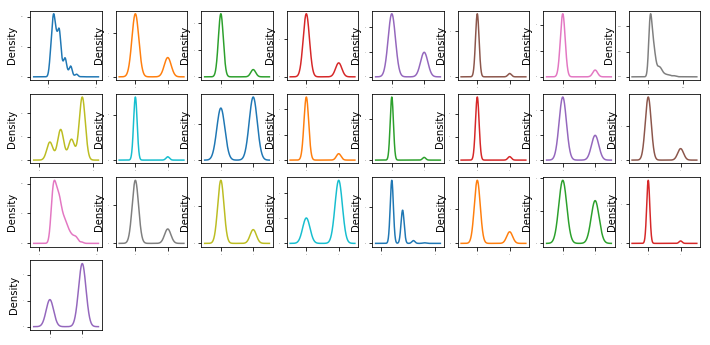

In [13]:
# density
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

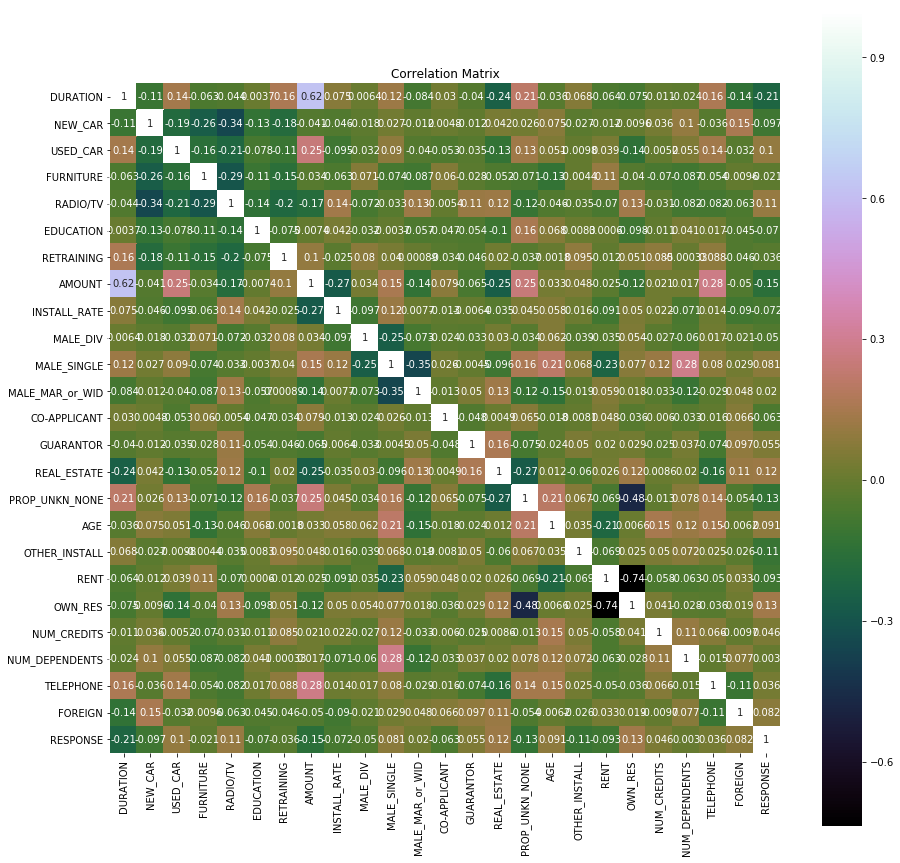

In [59]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

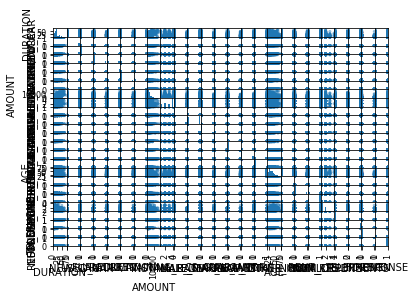

In [84]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
pyplot.show()


<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning


<a id='3.2'></a>
## 4.2. Feature Selection
Statistical tests can be used to select those features that have the strongest relationship with the output variable.The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.
The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Dataset.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
bestfeatures
pd.DataFrame(Y_train).head(5)

,0
600,1
80,0
158,1
423,1
747,0


In [20]:
fit = bestfeatures.fit(pd.DataFrame(X),pd.DataFrame(Y))
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs      Score
7           AMOUNT  58262.490
0         DURATION    321.031
26     C_ACCOUNT_3     63.003
16             AGE     30.200
44     CRED_HIST_4     23.345
41     CRED_HIST_1     17.190
40     S_ACCOUNT_4     13.646
15  PROP_UNKN_NONE     13.378
24     C_ACCOUNT_1     10.453
17   OTHER_INSTALL     10.446


<a id='3.3'></a>
## 4.3. Data Transformation

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [ ]:
# split out validation dataset for the end
#array = dataset.values
# X = array[:,0:-1].astype(float)
# Y = array[:,-1]
# X = array[:,0:-1].astype(float)
# Y = array[:,-1]

#creating the target variable
target=dummies[['RESPONSE']]

#dropping the target variable from the data set
dummies.drop('RESPONSE',axis=1,inplace=True)

#creating the data as numpy array
data=dummies
data.shape

#transforming the target into numpy array
target=np.array(target)
target=pd.DataFrame(target)
#target.shape

#Using X as data and y as target
X=data
Y=target
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [21]:
# test options
num_folds = 10
seed = 7
scoring = 'accuracy'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1. Common Models

In [27]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [ ]:
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))



<a id='4.3.3'></a>
### 5.3.3. Deep Learning Model

In [28]:
#Writing the Deep Learning Classifier in case the Deep Learning Flag is Set to True
#Set the following Flag to 1 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Function to create model, required for KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(2, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [177]:
create_model

<function __main__.create_model(neurons=12, activation='relu', learn_rate=0.01, momentum=0)>

Running all the Models together and getting the model results

In [29]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.731250 (0.030746)
LDA: 0.746250 (0.035377)
KNN: 0.625000 (0.051539)
CART: 0.671250 (0.030130)
NB: 0.703750 (0.033096)
SVM: 0.686250 (0.038099)
AB: 0.710000 (0.026101)
GBM: 0.708750 (0.026839)
RF: 0.687500 (0.048088)
ET: 0.691250 (0.047451)
NN: 0.605000 (0.082386)
DNN: 0.653750 (0.115792)


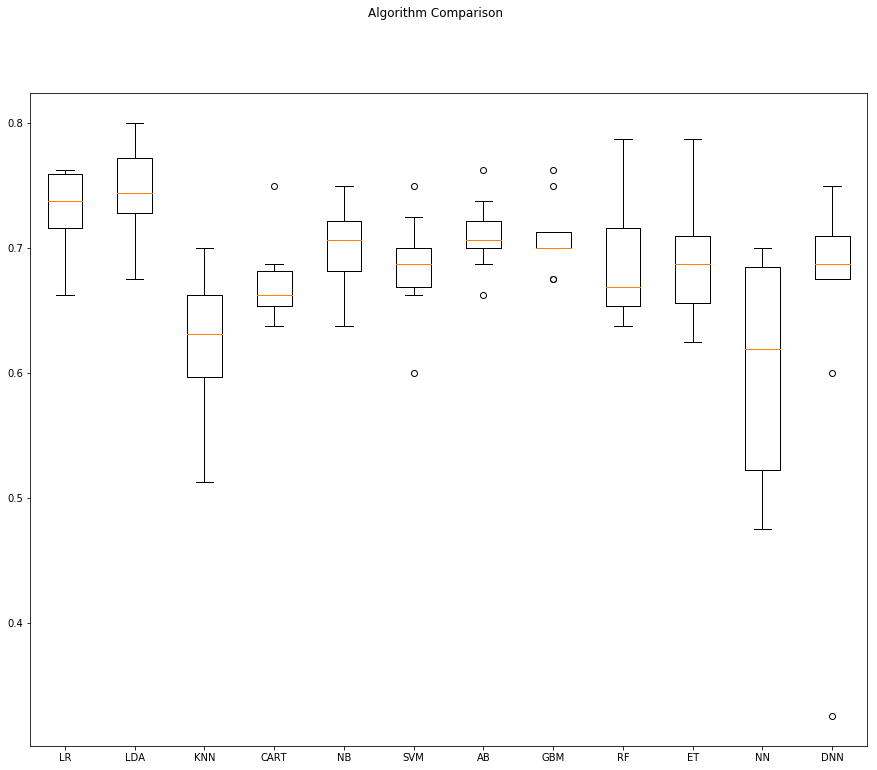

In [30]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,12)
pyplot.show()

Right now LR, KNN, GBM and NN are proving the best with accuracy models. (But what about variance? KNN seemed to indicate a tighter variance during spot checking).



<a id='H6'></a>
# Postprocessing the data : Data Standardisation

Let's try data postprocessing on data this time. Because apparantly the ensembles we are using are based on decision trees and thus are less sensitive to data distributions. (Ok. Nice tip!)

In [82]:
# standardized the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('CART', AdaBoostClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesClassifier())])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', StandardScaler()), ('NN', MLPClassifier())])))
pipelines.append(('ScaledDNN', Pipeline([('Scaler', StandardScaler()), ('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0))])))

In [32]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.737500 (0.029580)
ScaledLDA: 0.746250 (0.035377)
ScaledKNN: 0.692500 (0.028062)
ScaledCART: 0.672500 (0.034821)
ScaledNB: 0.646250 (0.119772)
ScaledSVM: 0.731250 (0.031746)
ScaledAB: 0.710000 (0.026101)
ScaledGBM: 0.710000 (0.026101)
ScaledRF: 0.698750 (0.040869)
ScaledET: 0.677500 (0.036142)
ScaledNN: 0.717500 (0.033634)
ScaledDNN: 0.681250 (0.050078)


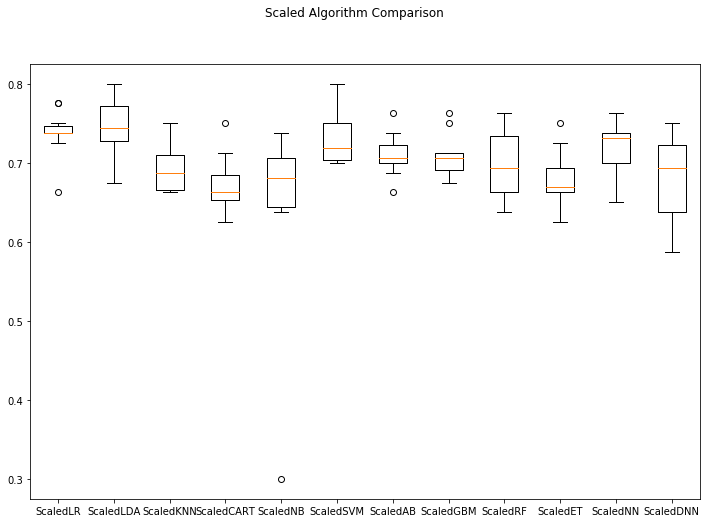

In [33]:
# compare scaled algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,8)
pyplot.show()

With data standardisation there is a significant improvement in the Non-Ensamble models,apparantly all four ensembles we are using are based on decision trees and thus are less sensitive to data distributions. (Ok. Nice tip!)

<a id='5'></a>
# 6. Model Tuning and Grid Search

Algorithm Tuning: Although some of the models show the most promising options. the grid search for all the methods are shown below.

In [34]:
# 1. Grid search : Logistic Regression Algorithm 
'''
penalty : str, ‘l1’, ‘l2’, ‘elasticnet’ or ‘none’, optional (default=’l2’)

C : float, optional (default=1.0)
Inverse of regularization strength; must be a positive float.Smaller values specify stronger regularization.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
C= np.logspace(-3,3,7)
penalty = ["l1","l2"]# l1 lasso l2 ridge
param_grid = dict(C=C,penalty=penalty )
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.738750 using {'C': 0.01, 'penalty': 'l2'}
#14 0.311250 (0.037687) with: {'C': 0.001, 'penalty': 'l1'}
#12 0.717500 (0.033166) with: {'C': 0.001, 'penalty': 'l2'}
#13 0.688750 (0.037687) with: {'C': 0.01, 'penalty': 'l1'}
#1 0.738750 (0.038507) with: {'C': 0.01, 'penalty': 'l2'}
#11 0.725000 (0.041833) with: {'C': 0.1, 'penalty': 'l1'}
#10 0.731250 (0.038426) with: {'C': 0.1, 'penalty': 'l2'}
#3 0.737500 (0.034004) with: {'C': 1.0, 'penalty': 'l1'}
#3 0.737500 (0.029580) with: {'C': 1.0, 'penalty': 'l2'}
#1 0.738750 (0.026487) with: {'C': 10.0, 'penalty': 'l1'}
#5 0.736250 (0.027642) with: {'C': 10.0, 'penalty': 'l2'}
#5 0.736250 (0.027642) with: {'C': 100.0, 'penalty': 'l1'}
#5 0.736250 (0.027642) with: {'C': 100.0, 'penalty': 'l2'}
#5 0.736250 (0.027642) with: {'C': 1000.0, 'penalty': 'l1'}
#5 0.736250 (0.027642) with: {'C': 1000.0, 'penalty': 'l2'}


In [35]:
# Grid Search : LDA Algorithm 
'''
n_components : int, optional (default=None)
Number of components for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
components  = [1,3,5,7,9,11,13,15,17,19,600]
param_grid = dict(n_components=components)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.746250 using {'n_components': 1}
#1 0.746250 (0.035377) with: {'n_components': 1}
#1 0.746250 (0.035377) with: {'n_components': 3}
#1 0.746250 (0.035377) with: {'n_components': 5}
#1 0.746250 (0.035377) with: {'n_components': 7}
#1 0.746250 (0.035377) with: {'n_components': 9}
#1 0.746250 (0.035377) with: {'n_components': 11}
#1 0.746250 (0.035377) with: {'n_components': 13}
#1 0.746250 (0.035377) with: {'n_components': 15}
#1 0.746250 (0.035377) with: {'n_components': 17}
#1 0.746250 (0.035377) with: {'n_components': 19}
#1 0.746250 (0.035377) with: {'n_components': 600}


In [36]:
# Grid Search KNN algorithm tuning
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for kneighbors queries.

weights : str or callable, optional (default = ‘uniform’)
    weight function used in prediction. Possible values: ‘uniform’, ‘distance’

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = [1,3,5,7,9,11,13,15,17,19,21]
weights = ['uniform', 'distance']
param_grid = dict(n_neighbors=neighbors, weights = weights )
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.718750 using {'n_neighbors': 19, 'weights': 'uniform'}
#21 0.647500 (0.046030) with: {'n_neighbors': 1, 'weights': 'uniform'}
#21 0.647500 (0.046030) with: {'n_neighbors': 1, 'weights': 'distance'}
#19 0.685000 (0.034821) with: {'n_neighbors': 3, 'weights': 'uniform'}
#20 0.683750 (0.035377) with: {'n_neighbors': 3, 'weights': 'distance'}
#17 0.693750 (0.028641) with: {'n_neighbors': 5, 'weights': 'uniform'}
#18 0.691250 (0.031150) with: {'n_neighbors': 5, 'weights': 'distance'}
#8 0.705000 (0.035000) with: {'n_neighbors': 7, 'weights': 'uniform'}
#16 0.701250 (0.033284) with: {'n_neighbors': 7, 'weights': 'distance'}
#2 0.717500 (0.035000) with: {'n_neighbors': 9, 'weights': 'uniform'}
#4 0.715000 (0.032500) with: {'n_neighbors': 9, 'weights': 'distance'}
#6 0.706250 (0.036336) with: {'n_neighbors': 11, 'weights': 'uniform'}
#10 0.703750 (0.035377) with: {'n_neighbors': 11, 'weights': 'distance'}
#8 0.705000 (0.035444) with: {'n_neighbors': 13, 'weights': 'uniform'}
#14 0.7025

In [37]:
# Grid Search : CART Algorithm 
'''
max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure 
    or until all leaves contain less than min_samples_split samples.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
max_depth = np.arange(2, 30)
param_grid = dict(max_depth=max_depth)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.717500 using {'max_depth': 5}
#13 0.687500 (0.039131) with: {'max_depth': 2}
#2 0.703750 (0.046787) with: {'max_depth': 3}
#6 0.693750 (0.044106) with: {'max_depth': 4}
#1 0.717500 (0.038406) with: {'max_depth': 5}
#3 0.702500 (0.041758) with: {'max_depth': 6}
#11 0.688750 (0.051372) with: {'max_depth': 7}
#19 0.675000 (0.063982) with: {'max_depth': 8}
#5 0.695000 (0.046503) with: {'max_depth': 9}
#8 0.692500 (0.062550) with: {'max_depth': 10}
#10 0.690000 (0.045346) with: {'max_depth': 11}
#9 0.691250 (0.050327) with: {'max_depth': 12}
#21 0.672500 (0.033448) with: {'max_depth': 13}
#4 0.698750 (0.041627) with: {'max_depth': 14}
#6 0.693750 (0.033657) with: {'max_depth': 15}
#11 0.688750 (0.046587) with: {'max_depth': 16}
#15 0.680000 (0.039211) with: {'max_depth': 17}
#21 0.672500 (0.036997) with: {'max_depth': 18}
#28 0.660000 (0.045000) with: {'max_depth': 19}
#26 0.666250 (0.039548) with: {'max_depth': 20}
#20 0.673750 (0.030337) with: {'max_depth': 21}
#21 0.672500 (0.045

In [38]:
# Grid Search : NB algorithm tuning
#GaussianNB only accepts priors as an argument so unless you have some priors to set for your model ahead of time 
#you will have nothing to grid search over.


In [39]:
# Grid Search: SVM algorithm tuning
'''
C : float, optional (default=1.0)
Penalty parameter C of the error term.

kernel : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. 
It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
Parameters of SVM are C and kernel. 
Try a number of kernels with various values of C with less bias and more bias (less than and greater than 1.0 respectively
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5]
kernel_values = ['linear', 'poly', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.733750 using {'C': 0.9, 'kernel': 'rbf'}
#3 0.731250 (0.028641) with: {'C': 0.1, 'kernel': 'linear'}
#23 0.688750 (0.037687) with: {'C': 0.1, 'kernel': 'poly'}
#23 0.688750 (0.037687) with: {'C': 0.1, 'kernel': 'rbf'}
#11 0.723750 (0.030847) with: {'C': 0.3, 'kernel': 'linear'}
#21 0.690000 (0.037417) with: {'C': 0.3, 'kernel': 'poly'}
#21 0.690000 (0.039051) with: {'C': 0.3, 'kernel': 'rbf'}
#11 0.723750 (0.030847) with: {'C': 0.5, 'kernel': 'linear'}
#17 0.698750 (0.035111) with: {'C': 0.5, 'kernel': 'poly'}
#14 0.707500 (0.037165) with: {'C': 0.5, 'kernel': 'rbf'}
#8 0.725000 (0.035355) with: {'C': 0.7, 'kernel': 'linear'}
#15 0.703750 (0.033096) with: {'C': 0.7, 'kernel': 'poly'}
#4 0.728750 (0.039151) with: {'C': 0.7, 'kernel': 'rbf'}
#5 0.727500 (0.040234) with: {'C': 0.9, 'kernel': 'linear'}
#18 0.697500 (0.035707) with: {'C': 0.9, 'kernel': 'poly'}
#1 0.733750 (0.038345) with: {'C': 0.9, 'kernel': 'rbf'}
#5 0.727500 (0.040234) with: {'C': 1.0, 'kernel': 'linear'}
#16 0.

In [40]:
# Grid Search: Ada boost Algorithm Tuning 
'''
n_estimators : integer, optional (default=50)
    The maximum number of estimators at which boosting is terminated. 
    In case of perfect fit, the learning procedure is stopped early.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [10, 100]
param_grid = dict(n_estimators=n_estimators)
model = AdaBoostClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.710000 using {'n_estimators': 100}
#2 0.676250 (0.039310) with: {'n_estimators': 10}
#1 0.710000 (0.032500) with: {'n_estimators': 100}


In [41]:
# Grid Search: GradientBoosting Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,180]
max_depth= [3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.727500 using {'max_depth': 5, 'n_estimators': 20}
#3 0.717500 (0.031225) with: {'max_depth': 3, 'n_estimators': 20}
#4 0.712500 (0.033541) with: {'max_depth': 3, 'n_estimators': 180}
#1 0.727500 (0.031524) with: {'max_depth': 5, 'n_estimators': 20}
#2 0.723750 (0.022673) with: {'max_depth': 5, 'n_estimators': 180}


In [42]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.726250 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#7 0.702500 (0.033912) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#5 0.711250 (0.035554) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#1 0.726250 (0.050140) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#4 0.715000 (0.042131) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.701250 (0.039706) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#6 0.703750 (0.038345) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#2 0.722500 (0.034369) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#3 0.718750 (0.033190) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [43]:
# Grid Search: ExtraTreesClassifier()
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.716250 using {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}
#6 0.701250 (0.033750) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#3 0.707500 (0.035000) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.706250 (0.030233) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#2 0.711250 (0.042738) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#7 0.698750 (0.041250) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#8 0.695000 (0.045139) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#5 0.705000 (0.043012) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#1 0.716250 (0.046452) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [44]:
# Grid Search : NN algorithm tuning
'''
hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
    The ith element represents the number of neurons in the ith hidden layer.
Other Parameters that can be tuned
    learning_rate_init : double, optional, default 0.001
        The initial learning rate used. It controls the step-size in updating the weights. Only used when solver=’sgd’ or ‘adam’.
    max_iter : int, optional, default 200
        Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
hidden_layer_sizes=[(20,), (50,), (20,20), (20, 30, 20)]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
model = MLPClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.727500 using {'hidden_layer_sizes': (20,)}
#1 0.727500 (0.038243) with: {'hidden_layer_sizes': (20,)}
#2 0.711250 (0.025890) with: {'hidden_layer_sizes': (50,)}
#4 0.678750 (0.030130) with: {'hidden_layer_sizes': (20, 20)}
#3 0.693750 (0.054271) with: {'hidden_layer_sizes': (20, 30, 20)}


In [45]:
# Grid Search : Deep Neural Network algorithm tuning
'''
neurons: int
    Number of patterns shown to the network before the weights are updated.     
batch_size: int
    Number of observation to read at a time and keep in memory.
epochs: int
    Number of times that the entire training dataset is shown to the network during training.
activation:
    The activation function controls the non-linearity of individual neurons and when to fire.
learn_rate :int
    controls how much to update the weight at the end of each batch
momentum : int
     momentum controls how much to let the previous update influence the current weight update
''' 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
#Hyperparameters that can be modified
neurons = [1, 5, 10, 15]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

#Changing only Neurons for the sake of simplicity
param_grid = dict(neurons=neurons)
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.723750 using {'neurons': 5}
#3 0.707500 (0.038406) with: {'neurons': 1}
#1 0.723750 (0.035111) with: {'neurons': 5}
#4 0.685000 (0.043229) with: {'neurons': 10}
#2 0.708750 (0.048750) with: {'neurons': 15}


<a id='6'></a>
# 7. Finalise the Model

Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.

Finalize Model with best parameters found during tuning step.

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [74]:
# prepare model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX, Y_train)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [65]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.835
[[ 27  24]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.75      0.53      0.62        51
           1       0.85      0.94      0.89       149

   micro avg       0.83      0.83      0.83       200
   macro avg       0.80      0.73      0.76       200
weighted avg       0.83      0.83      0.82       200



The accuracy on the validation set was 85.7%. Very close to our original estimates.

In [80]:
predictions

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [81]:
Y_validation

,0
778,1
334,0
271,1
802,1
216,1
408,1
812,0
94,1
487,1
170,0


<a id='6.2'></a>
## 7.2. Variable Intuition/Feature Importance
Looking at the details above GBM might be worthy of further study, but for now SVM shows a lot of promise as a low complexity and stable model for this problem.
Let us look into the Feature Importance of the GBM model

[1.41888140e-01 3.13847048e-02 1.63355527e-02 4.38608890e-03
 8.76087576e-03 1.07703051e-02 4.24211876e-03 1.77891262e-01
 1.42756424e-02 6.12114006e-03 6.90587951e-03 8.91253103e-05
 1.00633374e-02 1.38642862e-02 5.92521462e-03 1.84052575e-02
 9.37030629e-02 2.59224921e-02 8.29249743e-03 2.61647612e-03
 9.18116092e-03 8.24820542e-03 2.87407137e-03 3.30033565e-03
 1.39789213e-02 1.04637486e-02 1.94114747e-01 7.07440649e-03
 3.91680392e-03 1.21236072e-03 8.32346901e-03 2.55416692e-04
 3.46834067e-03 1.49881448e-02 2.25724757e-03 1.46302969e-02
 8.82856630e-04 4.61219826e-03 5.75541032e-04 6.21822784e-03
 3.78128010e-02 1.52514371e-02 2.83990821e-03 1.64681482e-02
 1.52077447e-02]


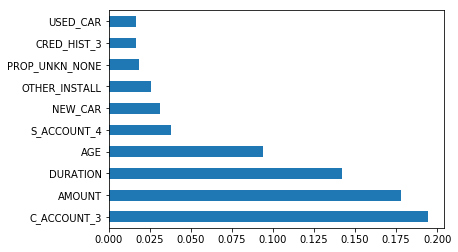

In [78]:
import pandas as pd
import numpy as np

##X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model = GradientBoostingClassifier()
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<a id='6.3'></a>
## 7.3. Save Model for Later Use